In [2]:
from PIL import Image

# Chapter 1

- PIL
- MatplotLib
- NumPy
- Scipy
- Advanced examples

##  Into to PIL

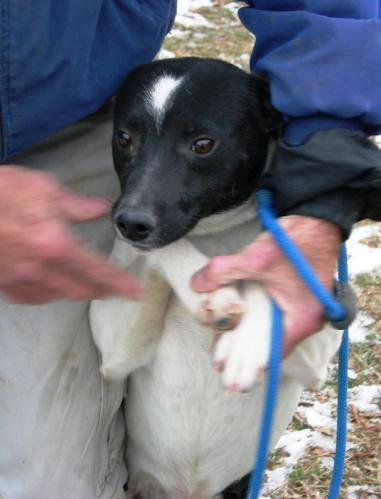

In [9]:
# open an image with PIL.Image
pil_im = Image.open('D:\\dog_cat_images\\test\\1.jpg')
pil_im

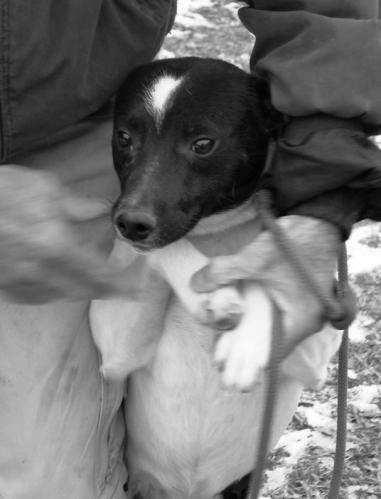

In [10]:
# convert to greyscale
pil_im.convert('L')